# Team One: The Opioid Crisis in the United States

### Analysis
* OBSERVED TREND For Research Question 1: According to the data, there is an opioid crisis in America. Opioid related deaths increased by more than an order of magnitude in 17 years. (1999: 2.0 deaths per 100,000 population; 2016: 12.6 deaths per 100,000 population.) By comparison, there was a negligable increase in anaesthesia deaths during the same period. Males are almost twice as likely to be affected as females. The age range of 25 - 54 years is most likely to be affected by the crisis. White people are twice as likely to be affected as black people; indigenous peoples are also heavily affected, while asian and pacific islanders are least affected by the crisis. The crisis is distributed fairly evenly throughout the continental United States, although there is a band in the geographic center of the country that is relatively unaffected. Both coasts of the country are heavily affected. Some notable hot-spots include West Virginia, the New England region, Oklahoma, parts of New Mexico, Utah, and Nevada, and the Pacific Northwest. Southern Alaska is affected, while Hawaii is only moderately affected.
* OBSERVED TREND For Research Question 2: CMS Medicare Part D Opioid Prescriber data reflects the change in opioid prescribing rates from 2013 to 2015 at the at the state level. At a high level, the majority of states see a decrease in opioid prescribing rates and an increase in extended-release rates over the three year period.  Wyoming is the only state to see an increase in opioid prescribing (0.23) and extended release prescribing (0.08). There are a few states that saw a decrease in both opioid prescribing and extended release prescribing: District of Columbia (-0.21 and -0.04), New Mexico (- 0.04 and -0.09), Oregon ( -0.30 and -0.15), and Washington ( -0.07 and -0.05)
* OBSERVED TREND For Research Question 3: 
* OBSERVED TREND For Research Question 4: Total CMS Spending increased from 398,350 to 1,254,525 million (214% increase). In this same time period National Health Expenditures also increased from 1,277,700 to 3,337,248 million (160% increase). Even though all National Health Expenditure costs increased, the percentage of those costs that were CMS increased from 31 to 37%.


###### Development team notes and caveats:
* 

#### Dependencies

In [1]:
import os                                                                    # os library

In [2]:
import numpy as np                                                           # numpy library

In [3]:
import pandas as pd                                                          # pandas library

In [4]:
import matplotlib.pyplot as plt                                              # pyplot module from matplotlib library

In [88]:
import geoplotlib                                                            # geoplotlib library

ModuleNotFoundError: No module named 'geoplotlib'

In [89]:
from geoplotlib.utils import BoundingBox                                     # BoundingBox module from geoplotlib.utils

ModuleNotFoundError: No module named 'geoplotlib'

In [90]:
from geoplotlib.colors import ColorMap                                       # ColorMap module from geoplotlib.colors

ModuleNotFoundError: No module named 'geoplotlib'

In [5]:
import seaborn as sns                                                        # seaborn library

In [92]:
import json                                                                  # json library

In [93]:
import statsmodels.api as sm                                                 # to use regressions

In [6]:
sns.set()                                                                    # switches to seaborn default display

#### Research Question 1: Does the crisis exist? If so, what is it's magnitude? Who is affected? Where is it occuring?

In [95]:
filename = 'Q1DS1.csv'                                                       # 1st data file for Q1

In [96]:
csv_file = os.path.join(".", "Data Files", "Question_1", filename)           # creates path to read data

In [97]:
q1ds1_df = pd.read_csv(csv_file, index_col="Year")                           # reads data from file
q1ds1_df.head()

,Year Code,Deaths,Population,Death Rate
Year,,,,
1999,1999,5594,279040168,2.004729
2000,2000,6011,281421906,2.135939
2001,2001,7088,284968955,2.487288
2002,2002,9318,287625193,3.239633
2003,2003,10389,290107933,3.581081


In [98]:
year_min = q1ds1_df.index.min()                                              # finds min and max dates
year_max = q1ds1_df.index.max()

In [99]:
plt.figure(figsize = (17,10))                                                # sets bar chart parameters
plt.title('Opioid Deaths By Year: %s to %s' % (year_min, year_max), fontdict = {'fontsize': 20})
plt.xlabel('Year', fontdict = {'fontsize': 16})
plt.ylabel('Deaths Per 100,000 Population', fontdict = {'fontsize': 16})
xvals = np.arange(len(q1ds1_df))
tick_locations = [value+0.4 for value in xvals]
plt.bar(xvals, q1ds1_df['Death Rate'], color='r', alpha=0.7, align="edge")
plt.xticks(tick_locations, q1ds1_df['Year Code'], rotation="horizontal")

([<matplotlib.axis.XTick at 0x1c16c8b198>,
 <a list of 18 Text xticklabel objects>)

In [100]:
axes = plt.gca()
c1min, c1max = axes.get_ylim()                                               # gets y limits, sanity check

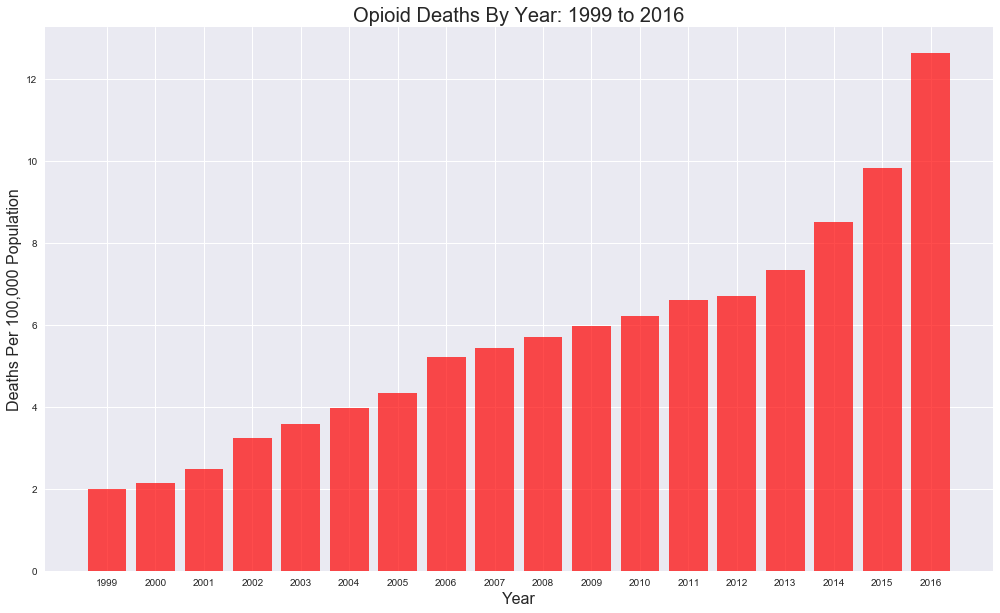

In [101]:
plt.savefig('./Output/Q1_Plot1.png', bbox_inches = 'tight')                  # saves plot to file
plt.show()                                                                   # displays plot

#### Sanity Check - Look at Anaesthesia Deaths For Same Period

In [102]:
filename = 'Q1DS2.csv'                                                       # 2nd data file for Q1

In [103]:
csv_file = os.path.join(".", "Data Files", "Question_1", filename)           # creates path to read data

In [104]:
q1ds2_df = pd.read_csv(csv_file, index_col="Year")                           # reads data from file

In [105]:
year_min = q1ds2_df.index.min()                                              # finds min and max dates
year_max = q1ds2_df.index.max()

In [106]:
plt.figure(figsize = (17,10))                                                # sets bar chart parameters
plt.title('Anaesthesia Deaths By Year: %s to %s' % (year_min, year_max), fontdict = {'fontsize': 20})
plt.xlabel('Year', fontdict = {'fontsize': 16})
plt.ylabel('Deaths Per 100,000 Population', fontdict = {'fontsize': 16})
xvals = np.arange(len(q1ds2_df))
tick_locations = [value+0.4 for value in xvals]
plt.bar(xvals, q1ds2_df['Death Rate'], color='b', alpha=0.7, align="edge")
plt.xticks(tick_locations, q1ds2_df['Year Code'], rotation="horizontal")
axes = plt.gca()
axes.set_ylim([c1min,c1max])                                                # set y limits to match first chart

(0.0, 13.250775089523252)

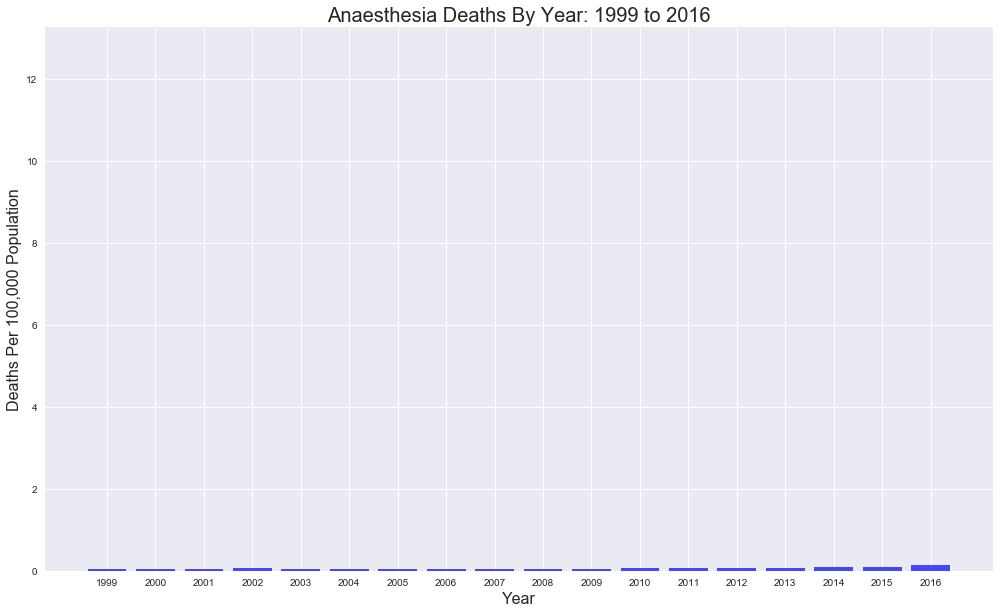

In [107]:
plt.savefig('./Output/Q1_Plot2.png', bbox_inches = 'tight')                  # saves plot to file
plt.show()                                                                   # displays plot

#### Who is affected?

In [108]:
filename = 'Q1DS3.csv'                                                       # 3rd data file for Q1
csv_file = os.path.join(".", "Data Files", "Question_1", filename)           # creates path to read data
q1ds3_df = pd.read_csv(csv_file)                                             # reads data from file
plt.figure(figsize = (12,10))                                                # sets bar chart parameters
plt.title('Opioid Death Rate By Gender', fontdict = {'fontsize': 20})
plt.xlabel('Gender', fontdict = {'fontsize': 16})
plt.ylabel('Deaths Per 100,000 Population', fontdict = {'fontsize': 16})
xvals = np.arange(len(q1ds3_df))
tick_locations = [value+0.4 for value in xvals]
plt.bar(xvals, q1ds3_df['Death Rate'], color='r', alpha=0.7, align="edge")
plt.xticks(tick_locations, q1ds3_df['Gender'], rotation="horizontal")

([<matplotlib.axis.XTick at 0x1c173ef438>,
 <a list of 2 Text xticklabel objects>)

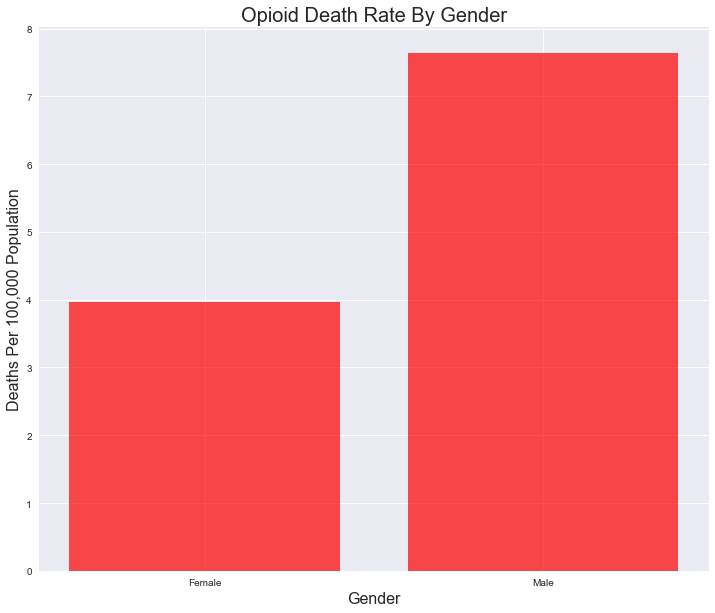

In [109]:
plt.savefig('./Output/Q1_Plot3.png', bbox_inches = 'tight')                  # saves plot to file
plt.show()                                                                   # displays plot

In [110]:
filename = 'Q1DS4.csv'                                                       # 4th data file for Q1
csv_file = os.path.join(".", "Data Files", "Question_1", filename)           # creates path to read data
q1ds4_df = pd.read_csv(csv_file)                                             # reads data from file
plt.figure(figsize = (12,10))                                                # sets bar chart parameters
plt.title('Opioid Death Rate By Age Group', fontdict = {'fontsize': 20})
plt.xlabel('Ten-Year Age Groups', fontdict = {'fontsize': 16})
plt.ylabel('Deaths Per 100,000 Population', fontdict = {'fontsize': 16})
xvals = np.arange(len(q1ds4_df))
tick_locations = [value+0.4 for value in xvals]
plt.bar(xvals, q1ds4_df['Death Rate'], color='r', alpha=0.7, align="edge")
plt.xticks(tick_locations, q1ds4_df['Ten-Year Age Groups'], rotation="horizontal")

([<matplotlib.axis.XTick at 0x1c169b39b0>,
 <a list of 11 Text xticklabel objects>)

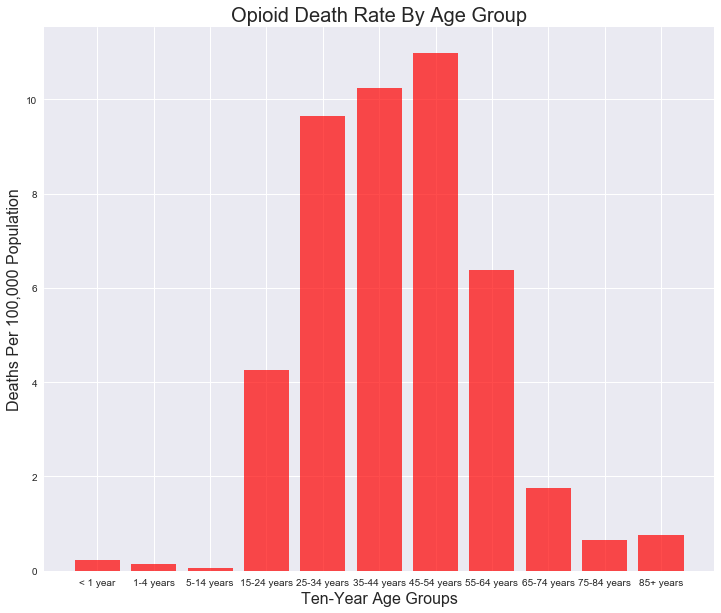

In [111]:
plt.savefig('./Output/Q1_Plot4.png', bbox_inches = 'tight')                  # saves plot to file
plt.show()                                                                   # displays plot

In [112]:
filename = 'Q1DS5.csv'                                                       # 5th data file for Q1
csv_file = os.path.join(".", "Data Files", "Question_1", filename)           # creates path to read data
q1ds5_df = pd.read_csv(csv_file)                                             # 5th data file for Q1
plt.figure(figsize = (12,10))                                                # sets bar chart parameters
plt.title('Opioid Death Rate By Race', fontdict = {'fontsize': 20})
plt.xlabel('Race', fontdict = {'fontsize': 16})
plt.ylabel('Deaths Per 100,000 Population', fontdict = {'fontsize': 16})
xvals = np.arange(len(q1ds5_df))
tick_locations = [value+0.4 for value in xvals]
plt.bar(xvals, q1ds5_df['Death Rate'], color='r', alpha=0.7, align="edge")
plt.xticks(tick_locations, q1ds5_df['Race'], rotation="horizontal")

([<matplotlib.axis.XTick at 0x1c1660e588>,
 <a list of 4 Text xticklabel objects>)

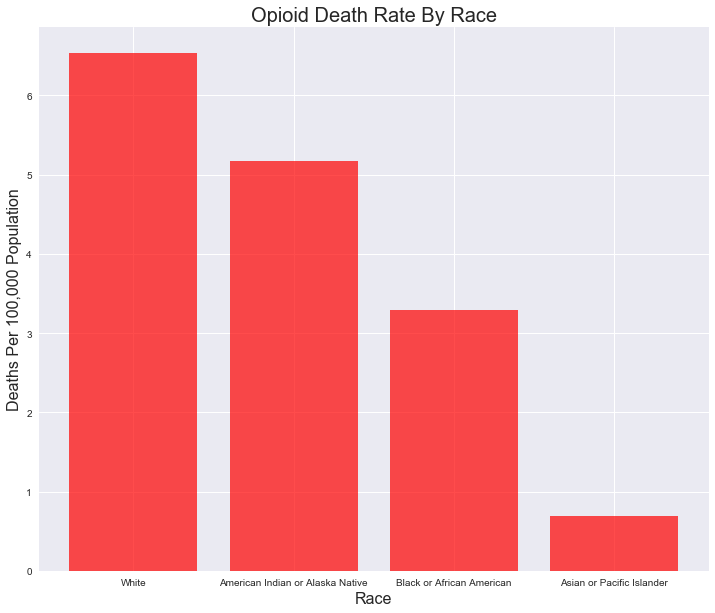

In [113]:
plt.savefig('./Output/Q1_Plot5.png', bbox_inches = 'tight')                  # saves plot to file
plt.show()                                                                   # displays plot

#### Where is it occuring?

In [114]:
filename = 'Q1DS6.json'                                                      # deaths data file for Q1
json_file_1 = os.path.join(".", "Data Files", "Question_1", filename)        # creates path to read data
filename = 'gz_2010_us_050_00_20m.json'                                      # map shape data file for Q1
json_file_2 = os.path.join(".", "Data Files", "Question_1", filename)        # creates path to read data

In [115]:
# function finds the death rate for the selected county, and converts it to color
def get_color(properties):
    key = str(int(properties['STATE'])) + properties['COUNTY']
    if key in Q1DS6:
        return cmap.to_color(Q1DS6.get(key), 5, 'lin')
    else:
        return [0, 0, 0, 0]

In [116]:
with open(json_file_1) as fin:                                              # opens json file
    Q1DS6 = json.load(fin)

In [117]:
cmap = ColorMap('Reds', alpha=255, levels=5)                               # displays map plot
geoplotlib.geojson(json_file_2, fill=True, color=get_color, f_tooltip=lambda properties: properties['NAME'])
geoplotlib.geojson(json_file_2, fill=False, color=[255, 255, 255, 64])
geoplotlib.set_bbox(BoundingBox.USA)
geoplotlib.show()

NameError: name 'ColorMap' is not defined

#### Research Question 2
#### Opioid Prescriber Rates

Change in Medicare Part D Opioid Prescribing Rates from 2013 to 2015 by State

In [7]:
# Took CMS Medicare Part D Opioid Prescribing Geographic 2013 2015 Excel file and created CSV files for the three taps 1) state 2) county and 3) zip
# Stored presciber-state file in a variable
prescriber_state = "Data Files/prescriber_state.csv"
prescriber_state_df = pd.read_csv(prescriber_state)
prescriber_state_df.head()

,State_Name,State_Abbreviation,State_FIPS,2013_Part_ D_Prescribers,2013_Part_Opioid_Prescribers,2013_Opioid Claims,2013_Extended_Release_Opioid_Claims,2013_Overall_Claims,2013_Opioid_Prescribing_Rate,2013_Extended_Release_Opioid_Prescribing_Rate,...,2014_Extended_Release_Opioid_Prescribing_Rate,2015_Part D Prescribers,2015_Part D Opioid Prescribers,2015_Opioid Claims,2015_Extended Release Opioid Claims,2015_Overall_Claims,2015_Opioid_Prescribing_Rate,2015_Extended_Release_Opioid_Prescribing_ Rate,2013_2015_Change_in_Opioid_Prescribing_Rate,2013_2015_Change_in_Extended_Release_Opioid_Prescribing_Rate
0,National,NaN,NaN,"1,037,770","491,500","78,045,683","4,773,286","1,342,096,654",5.82,6.12,...,6.27,"1,090,979","496,383","78,372,855","5,257,481","1,418,618,875",5.52,6.71,-0.30,0.59
1,Alabama,AL,1.0,"12,820","7,422","2,260,284","118,523","29,160,952",7.75,5.24,...,5.24,"13,492","6,980","2,179,506","121,061","28,898,258",7.54,5.55,-0.21,0.31
2,Alaska,AK,2.0,"2,275","1,099","86,517","8,602","1,281,057",6.75,9.94,...,10.44,"2,342","1,067","89,275","9,509","1,339,671",6.66,10.65,-0.09,0.71
3,Arizona,AZ,4.0,"20,542","10,510","1,545,138","151,086","22,126,421",6.98,9.78,...,9.78,"21,833","10,992","1,649,600","169,215","24,315,477",6.78,10.26,-0.20,0.48
4,Arkansas,AR,5.0,"7,909","4,700","1,128,356","57,519","16,759,116",6.73,5.10,...,5.17,"8,327","4,714","1,132,475","63,261","17,786,636",6.37,5.59,-0.36,0.49


In [8]:
#Selected the opioid prescribe rate columsn for years 2013-2015
prescriber_state_rate_df = prescriber_state_df[["State_Name","State_Abbreviation","2013_Opioid_Prescribing_Rate","2013_Extended_Release_Opioid_Prescribing_Rate","2014_Opioid_Prescribing_Rate","2014_Extended_Release_Opioid_Prescribing_Rate","2015_Opioid_Prescribing_Rate","2015_Extended_Release_Opioid_Prescribing_ Rate","2013_2015_Change_in_Opioid_Prescribing_Rate","2013_2015_Change_in_Extended_Release_Opioid_Prescribing_Rate "]]
prescriber_state_df.fillna("National")
prescriber_state_df.head()

,State_Name,State_Abbreviation,State_FIPS,2013_Part_ D_Prescribers,2013_Part_Opioid_Prescribers,2013_Opioid Claims,2013_Extended_Release_Opioid_Claims,2013_Overall_Claims,2013_Opioid_Prescribing_Rate,2013_Extended_Release_Opioid_Prescribing_Rate,...,2014_Extended_Release_Opioid_Prescribing_Rate,2015_Part D Prescribers,2015_Part D Opioid Prescribers,2015_Opioid Claims,2015_Extended Release Opioid Claims,2015_Overall_Claims,2015_Opioid_Prescribing_Rate,2015_Extended_Release_Opioid_Prescribing_ Rate,2013_2015_Change_in_Opioid_Prescribing_Rate,2013_2015_Change_in_Extended_Release_Opioid_Prescribing_Rate
0,National,NaN,NaN,"1,037,770","491,500","78,045,683","4,773,286","1,342,096,654",5.82,6.12,...,6.27,"1,090,979","496,383","78,372,855","5,257,481","1,418,618,875",5.52,6.71,-0.30,0.59
1,Alabama,AL,1.0,"12,820","7,422","2,260,284","118,523","29,160,952",7.75,5.24,...,5.24,"13,492","6,980","2,179,506","121,061","28,898,258",7.54,5.55,-0.21,0.31
2,Alaska,AK,2.0,"2,275","1,099","86,517","8,602","1,281,057",6.75,9.94,...,10.44,"2,342","1,067","89,275","9,509","1,339,671",6.66,10.65,-0.09,0.71
3,Arizona,AZ,4.0,"20,542","10,510","1,545,138","151,086","22,126,421",6.98,9.78,...,9.78,"21,833","10,992","1,649,600","169,215","24,315,477",6.78,10.26,-0.20,0.48
4,Arkansas,AR,5.0,"7,909","4,700","1,128,356","57,519","16,759,116",6.73,5.10,...,5.17,"8,327","4,714","1,132,475","63,261","17,786,636",6.37,5.59,-0.36,0.49


In [13]:
#Selected the opioid prescribe rate columsn for years 2013-2015

prescriber_state_rate_changeex_df = prescriber_state_df[["State_Name","2013_2015_Change_in_Opioid_Prescribing_Rate", "2013_2015_Change_in_Extended_Release_Opioid_Prescribing_Rate "]]
prescriber_state_rate_changeex_df.columns = ['State', 'Opioid', 'Extended Release']
prescriber_state_rate_changeex_df.set_index("State", inplace = True)
prescriber_state_rate_changeex_df.head()

prescriber_state_rate_change_za =prescriber_state_rate_changeex_df.sort_index(ascending=False)
prescriber_state_rate_change_za.head()

,Opioid,Extended Release
State,,
Wyoming,0.23,0.08
Wisconsin,-0.10,0.30
West Virginia,-0.73,0.33
Washington,-0.07,-0.05
Virginia,-0.41,0.45


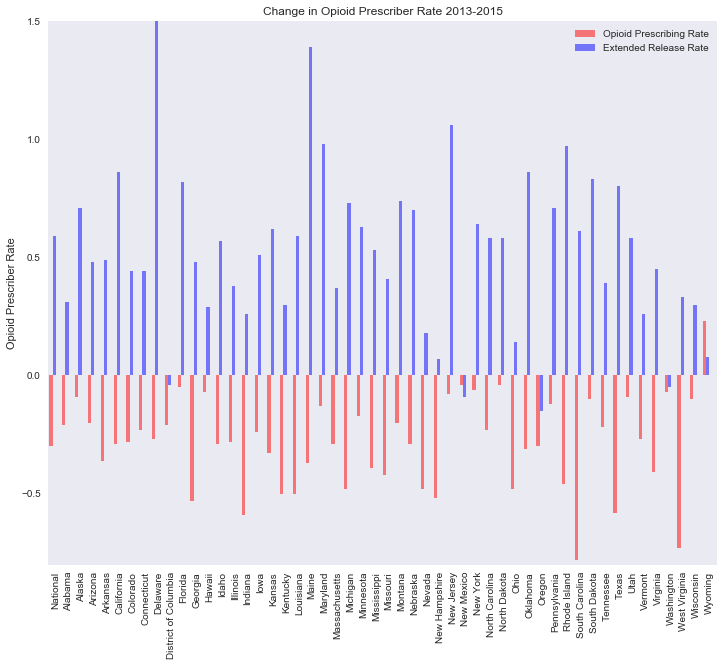

In [10]:
# Setting the positions and width for the bars
pos = list(range(len(prescriber_state_rate_df["State_Name"]))) 
width = 0.25 


# Plotting the bars
fig, ax = plt.subplots(figsize=(12,10))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
         
        prescriber_state_rate_changeex_df["Opioid"],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='r', 
        # with label the first value in first_name
        label=prescriber_state_rate_changeex_df["Opioid"][0]) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        prescriber_state_rate_changeex_df["Extended Release"],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='b', 
        # with label the second value in first_name
        label= prescriber_state_rate_changeex_df["Extended Release"][1]) 

# Set the y axis label
ax.set_ylabel('Opioid Prescriber Rate')
#plt.ylabel("Prescribing Rate")

# Set the chart's title
ax.set_title("Change in Opioid Prescriber Rate 2013-2015", loc='center')
#plt.title("CMS Medicare Part D Opioid Prescribing Rates 2013-2015 by Sate")

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(prescriber_state_rate_df["State_Name"], rotation = "vertical")
#plt.xlabel("State")



# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([-0.8, max( prescriber_state_rate_changeex_df["Opioid"] + prescriber_state_rate_changeex_df["Extended Release"])] )

# Adding the legend and showing the plot
plt.legend(['Opioid Prescribing Rate', 'Extended Release Rate'], loc='upper right')
plt.grid()
plt.show() # displays plot

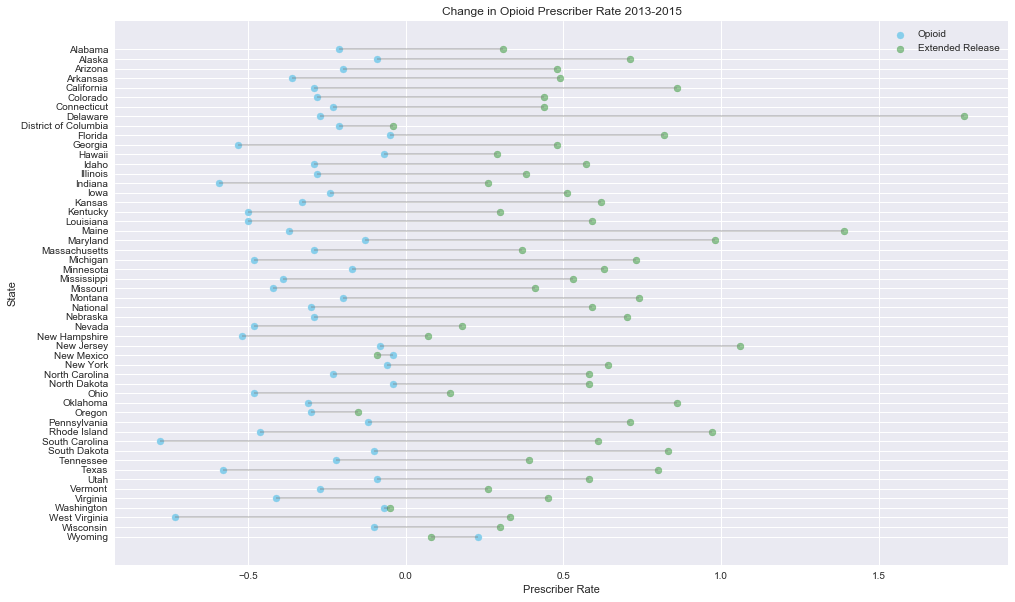

In [11]:
# Plot the lollipop plot
plt.figure(figsize=(16,10))
my_range=range(1,len(prescriber_state_rate_change_za.index)+1)
plt.hlines(y=my_range, xmin=prescriber_state_rate_change_za["Opioid"], xmax=prescriber_state_rate_change_za["Extended Release"], color='grey', alpha=0.4)
plt.scatter(prescriber_state_rate_change_za["Opioid"], my_range, color='skyblue', alpha=1, label='Opioid')
plt.scatter(prescriber_state_rate_change_za["Extended Release"], my_range, color='green', alpha=0.4 , label='Extended Release')
plt.legend()


# Add title and axis names
plt.yticks(my_range, prescriber_state_rate_change_za.index)
plt.title("Change in Opioid Prescriber Rate 2013-2015", loc='center')
plt.xlabel('Prescriber Rate')
plt.ylabel('State')

plt.show() # displays plot

#### Research Question 3
####  - Impact of the opioid epidemic
Are urban areas impacted more by the opioid epidemic? Scatterplot of Urban vs. not urban 

In [ ]:
#importing csv files

csv_file = r'Data Files/Question_3/ChangeOpiodDeaths(00-10).csv'

OpDeathsDelta_df = pd.read_csv(csv_file)


In [ ]:
# scatterplot: Urban population % by state in year 2010 on change in opioid death rates from years 2000-2010 

sns.lmplot(x='2010', y='Change in Death', data = OpDeathsDelta_df, size = 8)

# set titles and labels
plt.title('Opioid Deaths and Urbanization (2000 - 2010)')
plt.xlabel('Urban population % by state in the Year 2010')
plt.ylabel('Change in Opioid Overdose Death Rate per 100,000')
plt.show()

In [ ]:
# regression of Opioid Deaths on Urbanization (2000 - 2010)

y = OpDeathsDelta_df['Change in Death']
x = OpDeathsDelta_df['2010']
x = sm.add_constant(x)
results = sm.OLS(y, x).fit()

results.summary()

#### - Crime and opioids

In [118]:
#importing csv file of overall crime

csv_file = r'Data Files/Question_3/crime_df.csv'

crime_df = pd.read_csv(csv_file)

#importing Opioid deaths df 

csv_file1 = r'Data Files/Question_3/OpiodDeathsUrbanPop.csv'

OpDeaths_Urb_df = pd.read_csv(csv_file1)


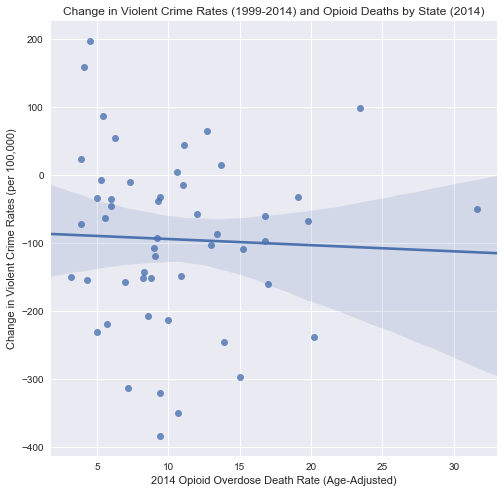

In [119]:
# Scatterplot of change in violent crime and opioid deaths in 2014
plt.figure(figsize=(8,8))
# scatter with regression line. 
sns.regplot(x=OpDeaths_Urb_df['2014__Opioid Overdose Death Rate (Age-Adjusted)'],\
           y=crime_df['Violent Crime rate_change'])
            #For some reason sns.lmplot doesn't work with data from two df's but sns.regplot does.

# set title and labels
plt.title('Change in Violent Crime Rates (1999-2014) and Opioid Deaths by State (2014)')
plt.xlabel('2014 Opioid Overdose Death Rate (Age-Adjusted)')
plt.ylabel('Change in Violent Crime Rates (per 100,000)')
plt.show()



In [120]:
# regression of Change in Violent Crime Rates (1999-2014) and Opioid Deaths by State (2014)

y = crime_df['Violent Crime rate_change']
x = OpDeaths_Urb_df['2014__Opioid Overdose Death Rate (Age-Adjusted)']
x = sm.add_constant(x)
results = sm.OLS(y, x).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Violent Crime rate_change   R-squared:                       0.002
Model:                                   OLS   Adj. R-squared:                 -0.019
Method:                        Least Squares   F-statistic:                   0.08176
Date:                       Fri, 05 Jan 2018   Prob (F-statistic):              0.776
Time:                               22:50:19   Log-Likelihood:                -318.43
No. Observations:                         51   AIC:                             640.9
Df Residuals:                             49   BIC:                             644.7
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                             -84.5308     37.541     -2.252      0.029    -159.971      -9.090
2014__Opioid Overdose Death Rate (Age-Adjusted)    -0.9056      3.167     -0.286      0.776      -7.270       5.459
==============================================================================
Omnibus:                        0.363   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.834   Jarque-Bera (JB):                0.291
Skew:                          -0.175   Prob(JB):                        0.865
Kurtosis:                       2.880   Cond. No.                         25.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

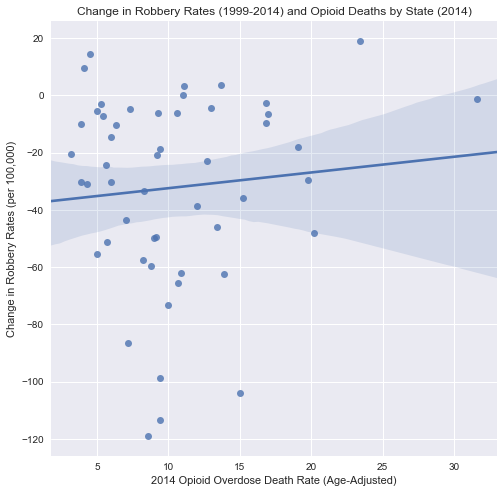

In [121]:
# Scatterplot of change in robbery rates and opioid deaths in 2014
plt.figure(figsize=(8,8))
sns.regplot(x=OpDeaths_Urb_df['2014__Opioid Overdose Death Rate (Age-Adjusted)'],\
           y=crime_df['Robbery rate_change'])

# set title and labels
plt.title('Change in Robbery Rates (1999-2014) and Opioid Deaths by State (2014)')
plt.xlabel('2014 Opioid Overdose Death Rate (Age-Adjusted)')
plt.ylabel('Change in Robbery Rates (per 100,000)')
plt.show()

In [122]:
# regression of Change in Robbery Rates (1999-2014) and Opioid Deaths by State (2014)
y = crime_df['Robbery rate_change']
x = OpDeaths_Urb_df['2014__Opioid Overdose Death Rate (Age-Adjusted)']
x = sm.add_constant(x)
results = sm.OLS(y, x).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Robbery rate_change   R-squared:                       0.009
Model:                             OLS   Adj. R-squared:                 -0.011
Method:                  Least Squares   F-statistic:                    0.4351
Date:                 Fri, 05 Jan 2018   Prob (F-statistic):              0.513
Time:                         22:50:19   Log-Likelihood:                -250.27
No. Observations:                   51   AIC:                             504.5
Df Residuals:                       49   BIC:                             508.4
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                             -37.9212      9.864     -3.845      0.000     -57.743     -18.099
2014__Opioid Overdose Death Rate (Age-Adjusted)     0.5489      0.832      0.660      0.513      -1.123       2.221
==============================================================================
Omnibus:                        7.046   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                6.576
Skew:                          -0.875   Prob(JB):                       0.0373
Kurtosis:                       3.178   Cond. No.                         25.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

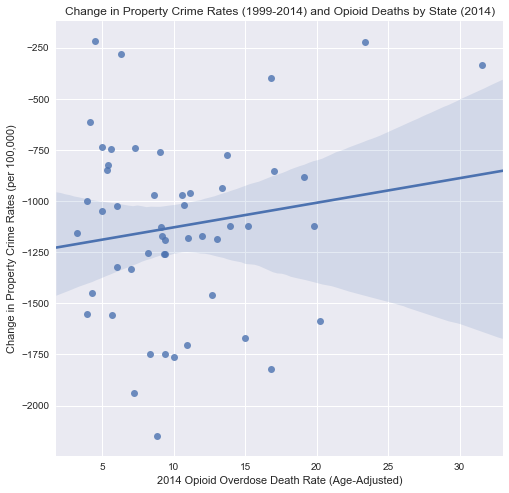

In [123]:
# Scatterplot of change in property crime rates and opioid deaths in 2014
plt.figure(figsize=(8,8))
sns.regplot(x=OpDeaths_Urb_df['2014__Opioid Overdose Death Rate (Age-Adjusted)'],\
           y=crime_df['Property crime rate_change'])

# set title and labels
plt.title('Change in Property Crime Rates (1999-2014) and Opioid Deaths by State (2014)')
plt.xlabel('2014 Opioid Overdose Death Rate (Age-Adjusted)')
plt.ylabel('Change in Property Crime Rates (per 100,000)')
plt.show()

In [124]:
# regression of Change in property crime rates and Opioid Deaths by State (2014)
y = crime_df['Property crime rate_change']
x = OpDeaths_Urb_df['2014__Opioid Overdose Death Rate (Age-Adjusted)']
x = sm.add_constant(x)
results = sm.OLS(y, x).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Property crime rate_change   R-squared:                       0.024
Model:                                    OLS   Adj. R-squared:                  0.004
Method:                         Least Squares   F-statistic:                     1.180
Date:                        Fri, 05 Jan 2018   Prob (F-statistic):              0.283
Time:                                22:50:20   Log-Likelihood:                -382.17
No. Observations:                          51   AIC:                             768.3
Df Residuals:                              49   BIC:                             772.2
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                           -1248.6099    130.989     -9.532      0.000   -1511.842    -985.377
2014__Opioid Overdose Death Rate (Age-Adjusted)    12.0066     11.051      1.087      0.283     -10.200      34.214
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.474
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.175
Skew:                          -0.068   Prob(JB):                        0.916
Kurtosis:                       2.748   Cond. No.                         25.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Research Question 4

In [125]:
# read cleaned csv into df
filename = 'Q4DS1.csv'         # 1st data file for Q4
csv_file = os.path.join(".", "Data Files", "Question_4", filename)           # creates path to read data
q4ds1_df = pd.read_csv(csv_file, index_col="Expenditure Amount (Millions)")                           # reads data from file
q4ds1_df.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Expenditure Amount (Millions),,,,,,,,,,,,,,,,,,,,,
Total National Health Expenditures,27214,29138,31842,34595,38394,41852,46081,51565,58402,65923,...,2295307,2399121,2495414,2598823,2689349,2797260,2879008,3026157,3200815,3337248
"Total CMS Programs (Medicaid, CHIP and Medicare)",-,-,-,-,-,-,3146,8065,9759,11220,...,767613,821394,884386,928553,963412,1004951,1049032,1128749,1207734,1254525
POPULATION,186,189,192,195,197,200,202,204,206,208,...,301,304,306,309,311,313,316,318,320,322


In [126]:
# Extract series of spending data 1999 - 2016 to compare against opioid deaths
cms_spending = q4ds1_df.loc['Total CMS Programs (Medicaid, CHIP and Medicare)','1999':'2016']
nhe_spending = q4ds1_df.loc['Total National Health Expenditures','1999':'2016']
percentage = cms_spending / nhe_spending

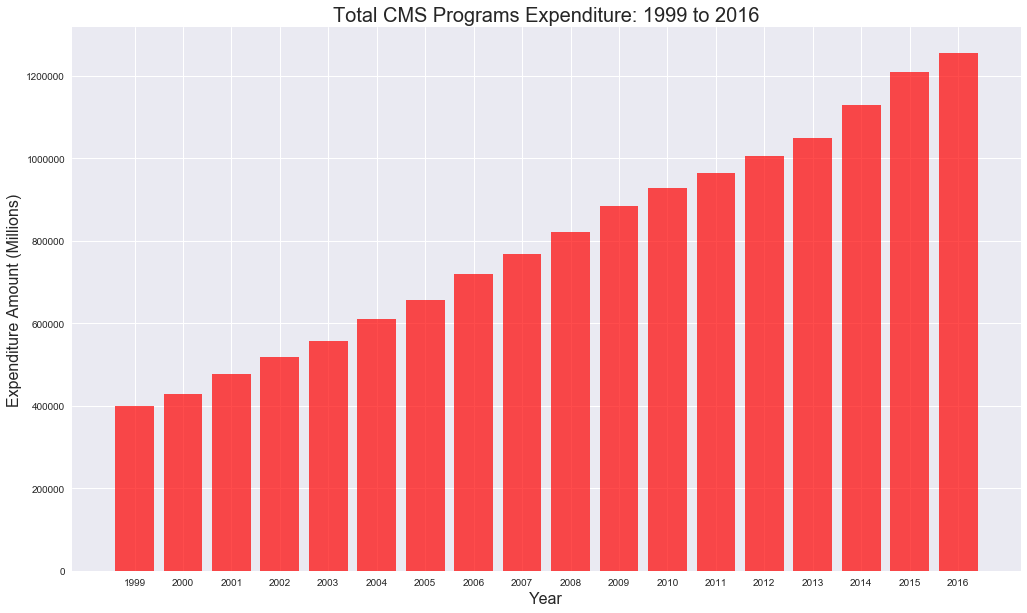

In [127]:
plt.figure(figsize = (17,10))                                                # sets bar chart parameters
plt.title('Total CMS Programs Expenditure: %s to %s' % (year_min, year_max), fontdict = {'fontsize': 20})
plt.xlabel('Year', fontdict = {'fontsize': 16})
plt.ylabel('Expenditure Amount (Millions)', fontdict = {'fontsize': 16})
xvals = np.arange(len(q1ds1_df))
tick_locations = [value+0.4 for value in xvals]
plt.bar(xvals, cms_spending, color='r', alpha=0.7, align="edge")
plt.xticks(tick_locations, q1ds1_df['Year Code'], rotation="horizontal")

plt.show()

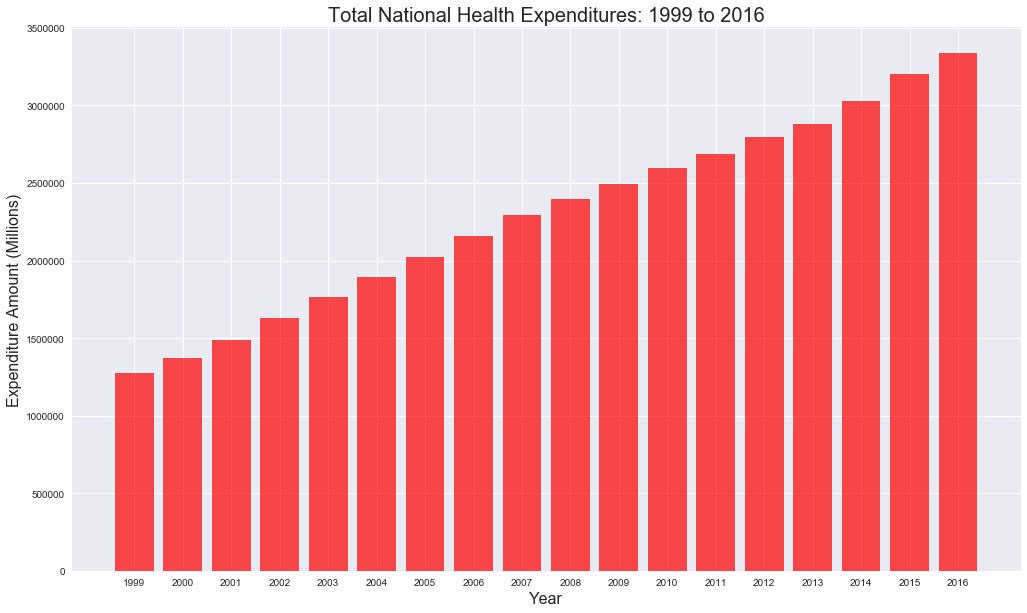

In [128]:
plt.figure(figsize = (17,10))                                                # sets bar chart parameters
plt.title('Total National Health Expenditures: %s to %s' % (year_min, year_max), fontdict = {'fontsize': 20})
plt.xlabel('Year', fontdict = {'fontsize': 16})
plt.ylabel('Expenditure Amount (Millions)', fontdict = {'fontsize': 16})
xvals = np.arange(len(q1ds1_df))
tick_locations = [value+0.4 for value in xvals]
plt.bar(xvals, nhe_spending, color='r', alpha=0.7, align="edge")
plt.xticks(tick_locations, q1ds1_df['Year Code'], rotation="horizontal")

plt.show()

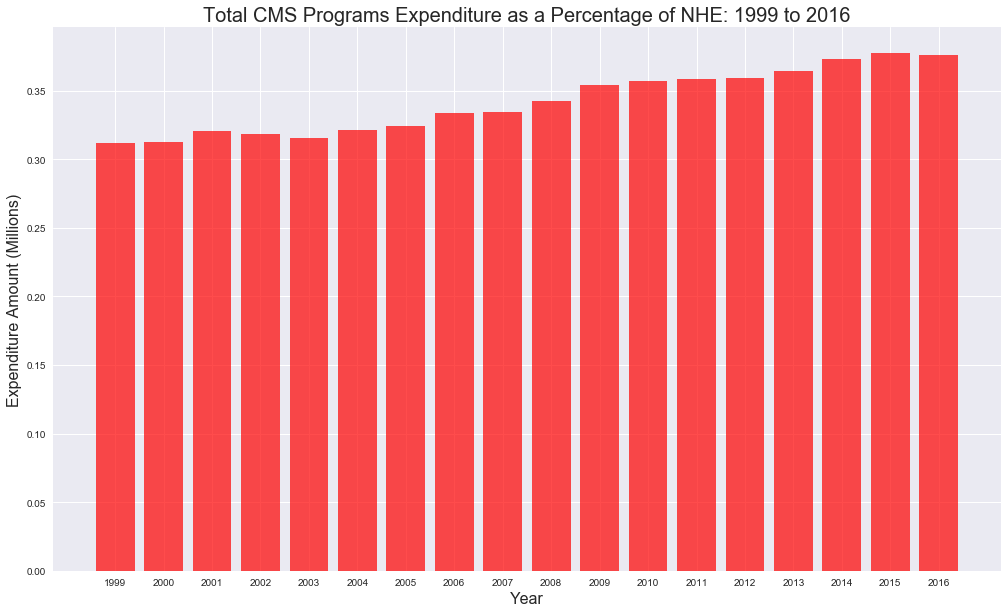

In [129]:
# plot CMS spending as percentage of NHE
plt.figure(figsize = (17,10))                                                # sets bar chart parameters
plt.title('Total CMS Programs Expenditure as a Percentage of NHE: %s to %s' % (year_min, year_max), fontdict = {'fontsize': 20})
plt.xlabel('Year', fontdict = {'fontsize': 16})
plt.ylabel('Expenditure Amount (Millions)', fontdict = {'fontsize': 16})
xvals = np.arange(len(q1ds1_df))
tick_locations = [value+0.4 for value in xvals]
plt.bar(xvals, cms_spending / nhe_spending, color='r', alpha=0.7, align="edge")
plt.xticks(tick_locations, q1ds1_df['Year Code'], rotation="horizontal")

plt.show()